<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Week 20 Lab</h1>
</div>

### By Juan Peralta

# Part 1

For part one, we're going to be using the following code:

(reference week-19 for help with this)

In [24]:
# our sql script

import sqlite3
from contextlib import closing

db = 'week-20-lab.db'

def connection(db_name=None):
    conn = None
    try:
        db_name = db_name or ':memory:'
        conn = sqlite3.connect(db_name)
        return conn
    except Exception as e:
        print(e)

def execute(db, cmd, commit=False, args=[]):
    with closing(connection(db)) as conn:
        with closing(conn.cursor()) as cursor:
            try:
                cur = cursor.execute(cmd, args).fetchall()
                if commit:
                    conn.commit()
                else:
                    return cur
            except Exception as e:
                print(e)    
                
def get_tables(db):
    rows = execute(db, "SELECT name from sqlite_master where type='table';")
    return [i[0] for i in rows]

def get_cols(db, table):
    return execute(db, f"pragma table_info({table});")

a. Create a table called 'students' with the following columns:
* first_name (string)
* last_name (string)
* course (string)

In [25]:
execute(db, 'CREATE TABLE students (first_name VARCHAR(20) NOT NULL, last_name VARCHA(20)NOT NULL, course VARCHAR(25) NOT NULL);',\
        commit=True)

table students already exists


b. Add 30 students to your table. 15 of them taking the course 'progressive web' and 15 taking 'data science'. 

In [26]:
from faker import Faker

fake = Faker()

#do this if condition == something esle do that
for i in range(30):
    execute(db, "INSERT INTO students VALUES (?,?,?);", commit = True, args=(fake.first_name(),fake.last_name(),"progressive web" if i <15 else "data science") )

execute(db, "SELECT * FROM students;")

[('Trevor', 'Robertson', 'progressive web'),
 ('Andrew', 'Ewing', 'progressive web'),
 ('Brent', 'Mathis', 'progressive web'),
 ('Justin', 'Gonzales', 'progressive web'),
 ('Nicole', 'Dudley', 'progressive web'),
 ('Tina', 'Williams', 'progressive web'),
 ('Michael', 'Myers', 'progressive web'),
 ('Jennifer', 'Wagner', 'progressive web'),
 ('Rebecca', 'Kemp', 'progressive web'),
 ('Beth', 'Martin', 'progressive web'),
 ('Lisa', 'Ortiz', 'progressive web'),
 ('Jacob', 'Nguyen', 'progressive web'),
 ('Rebecca', 'Fuller', 'progressive web'),
 ('Howard', 'Santana', 'progressive web'),
 ('Clinton', 'Gonzalez', 'progressive web'),
 ('Theresa', 'King', 'data science'),
 ('Billy', 'Ross', 'data science'),
 ('Matthew', 'James', 'data science'),
 ('Anthony', 'Davis', 'data science'),
 ('Charles', 'Ballard', 'data science'),
 ('Anita', 'Hood', 'data science'),
 ('Mark', 'Davis', 'data science'),
 ('Taylor', 'Buck', 'data science'),
 ('Michael', 'Morris', 'data science'),
 ('Derek', 'Soto', 'data 

c. One of the students from the data science course got hired! Show the SQL command that will remove this student from the table and then remove them. 

In [27]:
execute(db, "DELETE FROM students WHERE first_name =  'Joseph' and last_name = 'Bennett';", \
    commit=True)

In [28]:
execute(db, "SELECT * FROM students;")

[('Trevor', 'Robertson', 'progressive web'),
 ('Andrew', 'Ewing', 'progressive web'),
 ('Brent', 'Mathis', 'progressive web'),
 ('Justin', 'Gonzales', 'progressive web'),
 ('Nicole', 'Dudley', 'progressive web'),
 ('Tina', 'Williams', 'progressive web'),
 ('Michael', 'Myers', 'progressive web'),
 ('Jennifer', 'Wagner', 'progressive web'),
 ('Rebecca', 'Kemp', 'progressive web'),
 ('Beth', 'Martin', 'progressive web'),
 ('Lisa', 'Ortiz', 'progressive web'),
 ('Jacob', 'Nguyen', 'progressive web'),
 ('Rebecca', 'Fuller', 'progressive web'),
 ('Howard', 'Santana', 'progressive web'),
 ('Clinton', 'Gonzalez', 'progressive web'),
 ('Theresa', 'King', 'data science'),
 ('Billy', 'Ross', 'data science'),
 ('Matthew', 'James', 'data science'),
 ('Anthony', 'Davis', 'data science'),
 ('Charles', 'Ballard', 'data science'),
 ('Anita', 'Hood', 'data science'),
 ('Mark', 'Davis', 'data science'),
 ('Taylor', 'Buck', 'data science'),
 ('Michael', 'Morris', 'data science'),
 ('Derek', 'Soto', 'data 

d. Two students named Bill Gates and Elon Musk tested into phase 2 for progressive web. Write the SQL command that will add them to the table and then add them.

In [29]:
# execute(db,(Elon, M,c),(Bill,g, c))
execute(db, "INSERT INTO students VALUES ('Elon','Musk','progressive web');", commit = True)
execute(db, "INSERT INTO students VALUES ('Bill','Gates', 'progressive web');", commit = True)

e. Elon Musk would like to go by a new name: 'XÆ Dogecoin-12'. Show the SQL command that would change his name and then run it. 

In [30]:
execute(db, "UPDATE students SET first_name='XÆ', last_name='Dogecoin-12' WHERE first_name = 'Elon' AND last_name='Musk';", commit=True)

f. Show the command that would allow us to see only the students who are part of the course `data science`.

In [31]:
execute(db, "SELECT * FROM students where course = 'data science';")

[('Theresa', 'King', 'data science'),
 ('Billy', 'Ross', 'data science'),
 ('Matthew', 'James', 'data science'),
 ('Anthony', 'Davis', 'data science'),
 ('Charles', 'Ballard', 'data science'),
 ('Anita', 'Hood', 'data science'),
 ('Mark', 'Davis', 'data science'),
 ('Taylor', 'Buck', 'data science'),
 ('Michael', 'Morris', 'data science'),
 ('Derek', 'Soto', 'data science'),
 ('David', 'Houston', 'data science'),
 ('Erika', 'Ray', 'data science'),
 ('Jennifer', 'Williams', 'data science'),
 ('Andrew', 'Hammond', 'data science'),
 ('Whitney', 'Hahn', 'data science'),
 ('John', 'Johnson', 'data science'),
 ('Amy', 'Parks', 'data science'),
 ('David', 'Butler', 'data science'),
 ('Paul', 'Rodriguez', 'data science'),
 ('William', 'Payne', 'data science'),
 ('Heather', 'Decker', 'data science'),
 ('Charles', 'Smith', 'data science'),
 ('Jared', 'Stevens', 'data science'),
 ('Angel', 'Wilcox', 'data science'),
 ('Kyle', 'Williams', 'data science'),
 ('Jill', 'Douglas', 'data science'),
 ('F

# Part 2

The following section uses the `unknown.csv` dataset located in `../datasets/`

a. Import and analyze the dataset. Make sure you do the following:

* read the csv file in as a `df`.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [33]:
df = pd.read_csv('../datasets/unknown.csv')

* output the top of the `df`.

In [34]:
df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


* output the columns.

In [35]:
df.columns

Index(['x', 'y'], dtype='object')

* show the shape of the `df`

In [36]:
df.shape

(300, 2)

* show the info.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


* check if we're missing any data and handle it.

In [38]:
df.isnull().sum() #we can testify that there is not missing data

x    0
y    0
dtype: int64

* chart the data so we can visualize any relationships

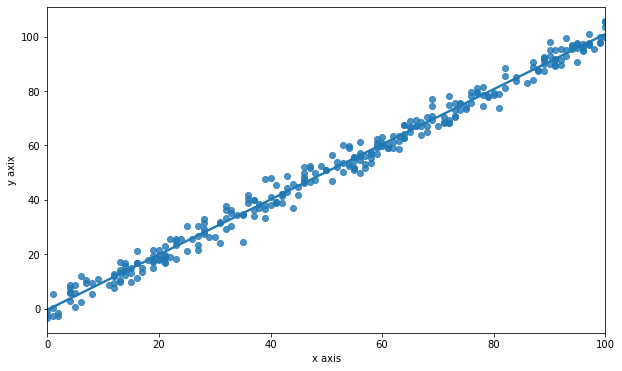

In [39]:
#sns.lmplot(x="bmi", y="charges", hue="smoker", data=df)
plt.figure(figsize=(10,6))
sns.regplot(x=df["x"], y=df["y"])

plt.ylabel('y axix')
plt.xlabel('x axis')
plt.show()

* show the covariance and correlation matrixes (including heatmap if you'd like).

In [40]:
#Correlation
df.corr()

,x,y
x,1.000000,0.994545
y,0.994545,1.000000


In [41]:
df.cov()

,x,y
x,812.494303,824.141698
y,824.141698,845.150999


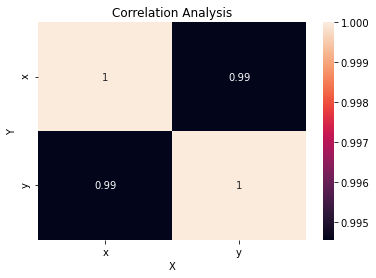

In [42]:
# Heatmap showing average arrival delay for each airline by month
plt.title("Correlation Analysis")
sns.heatmap(data=df.corr(), annot=True)

# Add label for horizontal axis
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

b. Train a linear regression model using week-20-class-2 as reference. We'd like to predict column `y`.

Make sure to do the following:
* Separate values into `X` and `Y` variables.

In [43]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
X = df["x"]
Y = df["y"]
#y_train.values.reshape(-1,1)
X = X.values.reshape(-1,1)

In [44]:
model = reg.fit(X, Y)

In [45]:
r_square = model.score(X,Y)
print('Coeficient of determination:',r_square)
print('Line intercept', model.intercept_)
print('coeficient', model.coef_)
print('Predictions of Y', model.predict(X))

Coeficient of determination: 0.9891203611402716
Line intercept -0.4618107736611776
coeficient [1.01433536]
Predictions of Y [ 77.64201157  20.83923168  21.85356704  19.82489633  36.05426201
  14.75321955  62.42698124  95.90004796  19.82489633   4.609866
   3.59553065  18.81056097  96.91438332  62.42698124  36.05426201
  14.75321955  65.46998731  13.7388842   87.78536512  69.52732873
  89.81403583  51.26929234  89.81403583  26.92524381  97.92871867
  58.36963982  79.67068228  20.83923168  93.87137725  26.92524381
  99.95738938  30.98258524  33.01125595  80.68501764  27.93957917
  47.21195092  53.29796305  69.52732873  27.93957917  33.01125595
  91.84270654  71.55599944  50.25495698  76.62767622   3.59553065
  37.06859737  70.54166408  68.51299337  40.11160343  35.03992666
  94.88571261  88.79970048  52.28362769  30.98258524  59.38397518
  -0.46181077  39.09726808  64.45565195  69.52732873  57.35530447
  12.72454884  72.57033479  76.62767622  61.41264589  82.71368835
  17.79622562  41.12

* Generate training and test data for `X` and `Y` using `train_test_split` (with a test size of 20%)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Y = Y.values.reshape(-1,1)

* Create an instance of the `LinearRegression` class and run the regression.

In [47]:
test_train_model = reg.fit(X_train, y_train)

* Output the score of the regression.

In [48]:
test_train_model.score(X_train, y_train)

0.9901830373524692

* Chart the data.

Coefficient of determination or R-square: 
 0.9901830373524692
Coefficients: 
 [1.01628648]
Intercept: 
 -0.4419982975427459


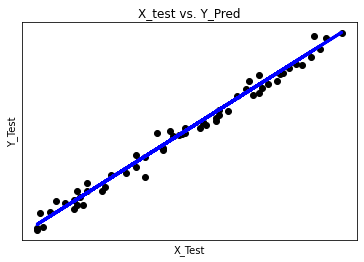

In [49]:
# Gettin Predicted Y
y_pred = model.predict(X_test)

# The coefficients
print('Coefficient of determination or R-square: \n', model.score(X_train, y_train))
print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

# Add title
plt.title("X_test vs. Y_Pred")

# Add label for horizontal axis
plt.xlabel("X_Test")
plt.ylabel("Y_Test")

plt.xticks(())
plt.yticks(())

plt.show()

* Bonus: what was the y-intercept and slope? Use the documentation to find this information out.

In [50]:
print('Line intercept', test_train_model.intercept_)

Line intercept -0.4419982975427459


# Part 3

Using a dataset of your choosing (try kaggle if stuck). Set up and run a linear regression on the data using the steps from Part 2. Don't worry if your results are inconclusive (it happens). Demonstrate that you're able to do it.

In [51]:
#Let us explore some real estate data
import pandas as pd
df_rent = pd.read_csv('../datasets/Real-estate.csv')

In [52]:
df_rent.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [53]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [54]:
# Checking for missing values
print('Number of Missing Values in Dataset: \n', df_rent.isnull().sum())

# Checking for duplicates
print('Number of Duplicates: \n', df_rent.duplicated().sum())


Number of Missing Values in Dataset: 
 No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64
Number of Duplicates: 
 0


In [55]:
# Preparing datasets
# Y: Response Variable --> price_sqf
from sklearn.model_selection import train_test_split
Y = df_rent["Y house price of unit area"]

X = df_rent.drop(columns=["Y house price of unit area","No","X1 transaction date"])

# checking for missing in Y

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [56]:
# Checking for missing values
print('Number of Missing Values in Dataset: \n', df_rent.isnull().sum())

# Checking for duplicates
print('Number of Duplicates: \n', df_rent.duplicated().sum())

Number of Missing Values in Dataset: 
 No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64
Number of Duplicates: 
 0


In [57]:
# setup model: Fitting Linear Regression with training data
rent_model = reg.fit(x_train, y_train)

In [60]:
#Printing R_square, Coefficients, intercept

# Gettin Predicted Y
y_pred = rent_model.predict(x_test)

# The coefficients
print('Coefficient of determination or R-square: \n', model.score(x_train, y_train))
print('Coefficients \n', rent_model.coef_)
print('Intercept: \n', rent_model.intercept_)


print("The linear model is: Y = {:.5} + {:.5}*house_age + {:.5}*distace_to_trans + {:.5}*no_convinience_store + {:.5}*latitude + {:.5}*longitude".format(rent_model.intercept_, rent_model.coef_[0], rent_model.coef_[1], rent_model.coef_[2], rent_model.coef_[3], rent_model.coef_[4]))

Coefficient of determination or R-square: 
 0.6351324455229728
Coefficients 
 [-2.67832422e-01 -4.01997372e-03  1.25557801e+00  2.77077758e+02
  2.21509438e+01]
Intercept: 
 -9568.880743820951
The linear model is: Y = -9568.9 + -0.26783*house_age + -0.00402*distace_to_trans + 1.2556*no_convinience_store + 277.08*latitude + 22.151*longitude


In [61]:
# To print out all regression output including statistical tests
import statsmodels.api as sm

X2_train = sm.add_constant(x_train)
est = sm.OLS(y_train, X2_train)
est2 = est.fit()
print(est2.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.635
Model:                                    OLS   Adj. R-squared:                  0.630
Method:                         Least Squares   F-statistic:                     113.1
Date:                        Sun, 14 Feb 2021   Prob (F-statistic):           5.64e-69
Time:                                17:40:51   Log-Likelihood:                -1157.7
No. Observations:                         331   AIC:                             2327.
Df Residuals:                             325   BIC:                             2350.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [58]:
import pandas as pd
df_trump_insult = pd.read_csv('../datasets/trump_insult_tweets_2014_to_2021.csv')

In [59]:
df_trump_insult[df_trump_insult["date"] > '2020-01-01']

,Unnamed: 0,date,target,insult,tweet
7622,7623,2020-01-02,impeachment-inquiry,"Witch Hunt is sputtering badly, but still goin...",A lot of very good people were taken down by a...
7623,7624,2020-01-04,impeachment-inquiry,this ridiculous Impeachment Lite Hoax,"As hard as I work, & as successful as our Coun..."
7624,7625,2020-01-06,los-angeles,poorly run,"....If however, the city or state in question ..."
7625,7626,2020-01-06,impeachment-inquiry,The great Scam continues,“The reason they are not sending the Articles ...
7626,7627,2020-01-06,impeachment-inquiry,this political Hoax,“The reason they are not sending the Articles ...
...,...,...,...,...,...
10355,10356,2021-01-06,2020-election,Many States want to decertify the mistake they...,If Vice President @Mike_Pence comes through fo...
10356,10357,2021-01-06,2020-election,"based on irregularities and fraud, plus corrup...","States want to correct their votes, which they..."
10357,10358,2021-01-06,2020-election,Our Election Process is worse than that of thi...,"They just happened to find 50,000 ballots late..."
10358,10359,2021-01-06,2020-election,a FRAUD,The States want to redo their votes. They foun...
